In [504]:
import os, gc, warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.plotly as py
init_notebook_mode(connected=True)
%matplotlib inline

In [505]:
countryCode_toName = {
    1: "India",
    14: "Australia",
    30: "Brazil",
    37: "Canada",
    94: "Indonesia",
    148: "New Zealand",
    162: "Phillipines",
    166: "Qatar",
    184: "Singapore",
    189: "South Africa",
    191: "Sri Lanka",
    208: "Turkey",
    214: "UAE",
    215: "United Kingdom",
    216: "United States",
}

In [506]:
def number_of_cusines(temp):
    #print (temp)
    return len(temp.split())

In [507]:
data = pd.read_csv("data/zomato.csv", encoding = "ISO-8859-1")
data['Country'] = data['Country Code'].apply(lambda x: countryCode_toName[x])
data.sample(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
273,17342781,Tony Roma's,216,Dubuque,"350 Bell St, Dubuque, IA 52001",Dubuque,"Dubuque, Dubuque",-90.658609,42.496464,"American, BBQ, Seafood",...,No,No,No,No,2,3.3,Orange,Average,65,United States
8970,18418649,Swag Sadda Desi,1,Noida,"Amrapali Zodiac Market, Sector 120, Near Secto...",Sector 72,"Sector 72, Noida",77.399233,28.585141,"Fast Food, North Indian",...,No,No,No,No,1,3.1,Orange,Average,8,India
7416,18451597,Sanjay Chicken Shop,1,New Delhi,"11/48, Subhash Nagar, New Delhi",Subhash Nagar,"Subhash Nagar, New Delhi",77.121210,28.637075,"Raw Meats, Fast Food",...,No,No,No,No,1,0.0,White,Not rated,0,India
681,2400016,Hot Stuff,1,Allahabad,"21 C, Lal Bhadhur Shastri Marg, Civil Lines, A...",Civil Lines,"Civil Lines, Allahabad",81.841889,25.452350,"North Indian, Fast Food",...,No,No,No,No,3,3.5,Yellow,Good,105,India
7267,5271,Kwality Pastry Parlour,1,New Delhi,"3, AL Market, Shalimar Bagh, New Delhi",Shalimar Bagh,"Shalimar Bagh, New Delhi",77.161862,28.703550,"Bakery, Desserts",...,No,No,No,No,1,3.5,Yellow,Good,51,India


In [508]:
labels = list(data.Country.value_counts().index)
values = list(data.Country.value_counts().values)

fig = {
    "data":[
        {
            "labels" : labels,
            "values" : values,
            "hoverinfo" : 'label+percent',
            "domain": {"x": [0, .9]},
            "hole" : 0.6,
            "type" : "pie",
            "rotation":120,
        },
    ],
    "layout": {
        "title" : "Zomato's Presence around the World",
        "annotations": [
            {
                "font": {"size":20},
                "showarrow": True,
                "text": "Countries",
                "x":0.2,
                "y":0.9,
            },
        ]
    }
}

iplot(fig)

In [509]:
data.Cuisines.fillna("zero", inplace=True)
data['Number of Cusines Offered'] = data.Cuisines.apply(number_of_cusines)

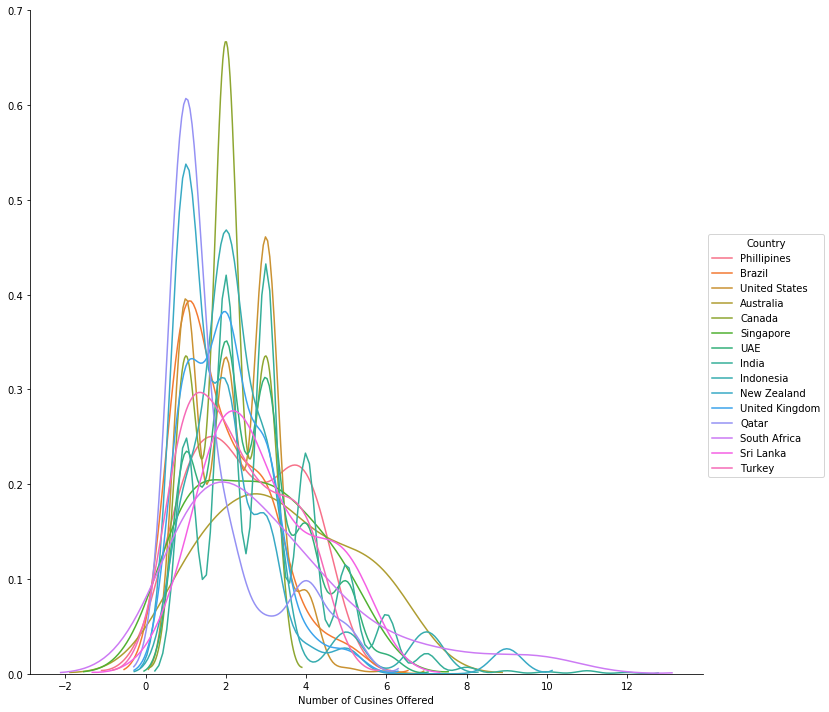

In [510]:
g = sns.FacetGrid(data, hue='Country', size=10)
g.map(sns.kdeplot, "Number of Cusines Offered")
g.add_legend()

In [511]:
data_india = data.loc[data.Country == "India"]

In [512]:
data_india['Text'] = data_india['Restaurant Name'] + "<br>" + data_india['Locality Verbose']
data = [
    go.Scatter(x = data_india['Average Cost for two'],
              y = data_india['Aggregate rating'],
               text = data_india['Text'],
              mode = "markers",
               marker = dict(opacity = 0.7,
                            size = 10,
                            color = data_india['Aggregate rating'], #Set color equalivant to rating
                            colorscale= 'Viridis',
                            showscale=True,
                             maxdisplayed=2500,
                            ),
                hoverinfo="text+x+y",
              )
]
iplot(data)

In [513]:
ncr_data = data_india.loc[data_india.City.isin(['New Delhi','Gurgaon','Noida','Faridabad'])]

In [514]:
types = {
    "Breakfast and Coffee" : ["Cafe Coffee Day", "Starbucks", "Barista", "Costa Coffee", "Chaayos", "Dunkin' Donuts"],
    "American": ["Domino's Pizza", "McDonald's", "Burger King", "Subway", "Dunkin' Donuts", "Pizza Hut"],
    "Ice Creams and Shakes": ["Keventers", "Giani", "Giani's", "Starbucks", "Baskin Robbins", "Nirula's Ice Cream"]
}
breakfast = ncr_data.loc[ncr_data['Restaurant Name'].isin(types['Breakfast and Coffee'])]
american = ncr_data.loc[ncr_data['Restaurant Name'].isin(types['American'])]
ice_cream = ncr_data.loc[ncr_data['Restaurant Name'].isin(types['Ice Creams and Shakes'])]

In [515]:
breakfast_rating = breakfast[['Restaurant Name',
                              'Aggregate rating']].groupby('Restaurant Name').mean().reset_index().sort_values('Aggregate rating', 
                                                                                                               ascending=False)
x_ax = breakfast_rating['Restaurant Name']
y_ax = breakfast_rating['Aggregate rating'].apply(lambda x: round(x,2))

data = [
    go.Bar(x = x_ax,
          y = y_ax,
          text = y_ax,
          textposition='auto',
          marker = dict(color = 'rgb(159, 202, 220)',
                       line = dict(color='rgb(8, 48, 107)',
                                  width=1.5),
                       ),
          opacity=0.6,
        hoverinfo="none"
          )
]

layout = go.Layout(title = "Average Ratings: Breakfast & Coffee",
                  yaxis = dict(title="Average Rating",
                              titlefont=dict(size=20)),
                   xaxis = dict(title="Cafe",
                               titlefont=dict(size=20),),
                  )


fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [516]:
breakfast_locations = breakfast[['Restaurant Name','Locality Verbose','City',
                                'Longitude','Latitude','Average Cost for two','Aggregate rating',
                                'Rating text']].reset_index(drop=True)
breakfast_locations['Text'] = breakfast_locations['Restaurant Name'] + "<br>Rating: "+breakfast_locations['Rating text']+" ("+breakfast_locations['Aggregate rating'].astype(str)+")" + "<br>" + breakfast_locations['Locality Verbose']
mapbox_access_token = 'pk.eyJ1Ijoic29taW53IiwiYSI6ImNqajN4cWZ4ODFlaHQzcW52ZzlvN2s5NG4ifQ.WtdnzCqgcSH0XzdMhwgyHw'
#breakfast_locations.sample(5)

In [517]:
data = [
    go.Scattermapbox(lat= breakfast_locations.Latitude,
                    lon = breakfast_locations.Longitude,
                    text = breakfast_locations['Restaurant Name'],
                    opacity = 0.8,
                    marker = dict(symbol = "cafe",
                                  size = 10,
                                 color="rgb(8, 48, 107)",
                                 opacity = 0.9,), 
                    hovertext = breakfast_locations['Text'], 
                    hoverlabel = dict(font = dict(size=15),),
                    mode = "markers+text",
                     
                    )
]

layout = go.Layout(autosize=True,
                   title = "Breakfast & Coffee in Delhi/Gurgaon & Neighbouring Areas<br>(Associated with Zomato)",
                   hovermode='closest',
                  mapbox = dict(
                  accesstoken = mapbox_access_token,
                  center = dict(lat = 28.63,
                               lon = 77.21,),
                  pitch = 0,
                zoom = 10,
                  ),
    )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="donut")

In [420]:
lunch_rating = american[['Restaurant Name',
                              'Aggregate rating']].groupby('Restaurant Name').mean().reset_index().sort_values('Aggregate rating', 
                                                                                                               ascending=False)
x_ax = lunch_rating['Restaurant Name']
y_ax = lunch_rating['Aggregate rating'].apply(lambda x: round(x,2))

data = [
    go.Bar(x = x_ax,
          y = y_ax,
          text = y_ax,
          textposition='auto',
          marker = dict(color = 'rgb(202, 202, 220)',
                       line = dict(color='rgb(8, 48, 107)',
                                  width=1.5),
                       ),
          opacity=0.6,
        hoverinfo="none",
          )
]

layout = go.Layout(title = "Average Ratings: Lunch",
                  yaxis = dict(title="Average Rating",
                              titlefont=dict(size=20)),
                   xaxis = dict(title="Restaurant",
                               titlefont=dict(size=20),),
                  )


fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [421]:
lunch_locations = american[['Restaurant Name','Locality Verbose','City',
                                'Longitude','Latitude','Average Cost for two','Aggregate rating',
                                'Rating text']].reset_index(drop=True)
lunch_locations['Text'] = lunch_locations['Restaurant Name'] + "<br>Rating: "+lunch_locations['Rating text']+" ("+lunch_locations['Aggregate rating'].astype(str)+")" + "<br>" + lunch_locations['Locality Verbose']

In [423]:
data = [
    go.Scattermapbox(lat= lunch_locations.Latitude,
                    lon = lunch_locations.Longitude,
                    text = lunch_locations['Restaurant Name'],
                    opacity = 0.8,
                    marker = dict(symbol = "restaurant",
                                  size = 10,
                                 color="rgb(8, 48, 107)", #does not work if the symbol isn't a circle
                                 opacity = 0.9,), 
                    hovertext = lunch_locations['Text'], 
                    hoverlabel = dict(font = dict(size=15),),
                    mode = "markers+text",
                     
                    )
]

layout = go.Layout(autosize=True,
                   title = "American Fast Food in Delhi/Gurgaon & Neighbouring Areas<br>(Associated with Zomato)",
                   hovermode='closest',
                  mapbox = dict(
                  accesstoken = mapbox_access_token,
                  center = dict(lat = 28.63,
                               lon = 77.21,),
                  pitch = 0,
                zoom = 10,
                  ),
    )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="donut")

In [429]:
des_rating = ice_cream[['Restaurant Name',
                              'Aggregate rating']].groupby('Restaurant Name').mean().reset_index().sort_values('Aggregate rating', 
                                                                                                               ascending=False)
x_ax = des_rating['Restaurant Name']
y_ax = des_rating['Aggregate rating'].apply(lambda x: round(x,2))

data = [
    go.Bar(x = x_ax,
          y = y_ax,
          text = y_ax,
          textposition='auto',
          marker = dict(color = 'rgb(0, 202, 220)',
                       line = dict(color='rgb(8, 48, 107)',
                                  width=1.5),
                       ),
          opacity=0.6,
        hoverinfo="none",
          )
]

layout = go.Layout(title = "Average Ratings: Ice Cream & Shakes",
                  yaxis = dict(title="Average Rating",
                              titlefont=dict(size=20)),
                   xaxis = dict(title="Parlour",
                               titlefont=dict(size=20),),
                  )


fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [430]:
des_locations = ice_cream[['Restaurant Name','Locality Verbose','City',
                                'Longitude','Latitude','Average Cost for two','Aggregate rating',
                                'Rating text']].reset_index(drop=True)
des_locations['Text'] = des_locations['Restaurant Name'] + "<br>Rating: "+des_locations['Rating text']+" ("+des_locations['Aggregate rating'].astype(str)+")" + "<br>" + des_locations['Locality Verbose']

In [434]:
data = [
    go.Scattermapbox(lat= des_locations.Latitude,
                    lon = des_locations.Longitude,
                    text = des_locations['Restaurant Name'],
                    opacity = 0.8,
                    marker = dict(symbol = "triangle",
                                  size = 10,
                                 color="rgb(8, 48, 107)", #does not work if the symbol isn't a circle
                                 opacity = 0.8,), 
                    hovertext = des_locations['Text'], 
                    hoverlabel = dict(font = dict(size=15),),
                    mode = "markers+text",
                     
                    )
]

layout = go.Layout(autosize=True,
                   title = "Ice Creams & Shakes Parlours in Delhi/Gurgaon & Neighbouring Areas<br>(Associated with Zomato)",
                   hovermode='closest',
                  mapbox = dict(
                  accesstoken = mapbox_access_token,
                  center = dict(lat = 28.63,
                               lon = 77.21,),
                  pitch = 0,
                zoom = 10,
                  ),
    )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="donut")